# Project 01 - Write a Data Science Blog Post

## Part 1: Understanding the business

### Data

Boston_calendar.csv  
Boston_listings.csv

### Business Questions

### Q1. How To Be a Super Host? 

### Q2. How the Price/Night Change Over the Year in Seattle?

### Q3. Can we Predict Property Price/Night in Seattle Using Machine Learning Model?

In [58]:
# Import All needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [59]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder,MinMaxScaler
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# After 6 hours of continous work and many trials with the imported ML algorithms and preprocessing techniques.....

# Part 2: Data Understanding

### Gather Data

We will read the data collected on kaggle.com and display it

In [60]:
# Import data for Seattle
df = pd.read_csv('Seattle_listings.csv')
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [61]:
# Read the data
df2 = pd.read_csv('Seattle_calendar.csv')
df2

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [62]:
# Transfer processed DF data to DF3
df3=df

## Part 3:  Data preparation

We will remove features that are not of interest and process missing and duplicate values to make the data more perfect

### Clean Data

In [63]:
# Check for duplicate values, check for duplicates in ID, and sum up to see quantity
df.duplicated(['id']).sum()
# No duplicate values

0

Delete data that we are not interested in 

In [64]:
# Based on data review, the columns in the list will be dropped:
to_drop_cols = ['host_verifications','host_has_profile_pic','street','neighbourhood','neighbourhood_group_cleansed', 'city', 'zipcode','state','market','smart_location',
                'country_code','country','xl_picture_url','host_id','host_url','id','last_scraped','listing_url','scrape_id','name','summary','space','neighborhood_overview',
                'notes','thumbnail_url','description','experiences_offered','neighbourhood','latitude','longitude','host_location','host_acceptance_rate',
                'amenities', 'square_feet','weekly_price','monthly_price','security_deposit','host_acceptance_rate','host_total_listings_count','calendar_last_scraped',
                'calendar_updated','host_response_rate',
  'medium_url','picture_url','host_name','host_about','host_thumbnail_url','host_neighbourhood','cleaning_fee','reviews_per_month','host_picture_url','host_listings_count','is_location_exact',
  'has_availability','availability_30','availability_60','availability_90','first_review','last_review','license','jurisdiction_names','calculated_host_listings_count']

In [65]:
# Delete some features
df.drop(columns=to_drop_cols,axis=1,inplace=True)

In [66]:
# View information on the remaining data after deletion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   transit                           2884 non-null   object 
 1   host_since                        3816 non-null   object 
 2   host_response_time                3295 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   host_identity_verified            3816 non-null   object 
 5   neighbourhood_cleansed            3818 non-null   object 
 6   property_type                     3817 non-null   object 
 7   room_type                         3818 non-null   object 
 8   accommodates                      3818 non-null   int64  
 9   bathrooms                         3802 non-null   float64
 10  bedrooms                          3812 non-null   float64
 11  beds                              3817 non-null   float64
 12  bed_ty

Some of these data types are object, but when we use them, they are treated as float, int, etc. This involves data conversion, and we will handle it next

In [67]:
# Host_ since to 'date time' for processing, and finally convert to 'float' for convenient use
df.host_since = pd.to_datetime(df.host_since)
df.host_since=(2021 - (df.host_since.dt.year + df.host_since.dt.month/12 +  (df.host_since.dt.day/365)))
df.host_since
# Data conversion completed

0       9.303196
1       7.775799
2       6.467123
3       7.066895
4       9.003881
          ...   
3813    5.631050
3814    5.128311
3815    4.917808
3816    5.908447
3817    6.598174
Name: host_since, Length: 3818, dtype: float64

Next, let's take a look at the missing values for us to process based on the features

In [68]:
# Check which features have missing values
df.isnull().sum().sort_values(ascending=False)

transit                             934
review_scores_accuracy              658
review_scores_checkin               658
review_scores_value                 656
review_scores_location              655
review_scores_cleanliness           653
review_scores_communication         651
review_scores_rating                647
host_response_time                  523
bathrooms                            16
bedrooms                              6
host_is_superhost                     2
host_since                            2
host_identity_verified                2
beds                                  1
property_type                         1
neighbourhood_cleansed                0
room_type                             0
accommodates                          0
require_guest_phone_verification      0
bed_type                              0
price                                 0
guests_included                       0
require_guest_profile_picture         0
minimum_nights                        0


There are a total of 16 columns with missing values. Here are my strategies for handling missing values for each column

For 'host'_ Response_ There are many missing rows in 'time' and 'transit', and filling in any value will affect the final result. Therefore, filling in the fixed value of 'no data' and changing the other data in 'transit' to 'have data' is convenient for later use

For 'host'_ Is_ Superhost has fewer missing rows and is a key feature with less t, so it is filled with a fixed value of t

For 'host'_ Since, 'host_ Identity_ Verified, 'property_ Type, host_ Is_ Superhost 'has fewer missing values and is not a key feature, so deleting it will hardly affect the results. Therefore, the row where the missing value is located will be deleted directly

For the three features of 'beds',' bedrooms', and 'bathrooms', the average value is used instead

In [69]:
# After Taking look on our data we will fill nulls and prepare features as follows:

In [70]:
# Missing values are padded as fixed values
df.host_response_time.fillna('nodata', inplace=True)
df.host_response_time.value_counts()

within an hour        1692
within a few hours     968
within a day           597
nodata                 523
a few days or more      38
Name: host_response_time, dtype: int64

In [71]:
# Missing values are padded as fixed values
df.host_is_superhost.fillna('t', inplace=True)
df.host_is_superhost.value_counts()

f    3038
t     780
Name: host_is_superhost, dtype: int64

In [72]:
# Missing values are padded as fixed values and converted to binary classification
df.transit.fillna('nodata',inplace=True)
mask = df.transit != 'nodata'
df.loc[mask,'transit'] = 'data' 
df.transit.value_counts()

data      2884
nodata     934
Name: transit, dtype: int64

In [73]:
# Missing Values: Deletes the row where the missing value is located 
#Due to the small number of missing values, deleting the row will not affect the results
df_host=['host_since', 'host_identity_verified', 'property_type', 'host_is_superhost']
df.dropna(subset = df_host, inplace=True)

In [74]:
# Missing values are replaced by means
df_room = ['beds', 'bedrooms', 'bathrooms']
df[df_room] = SimpleImputer().fit_transform(df[df_room])

In [75]:
# Missing values are replaced by the mode
df_review = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
for i in df_review:
    df[i]=df[i].fillna(df[i].mode()[0])

In [76]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)
# No

require_guest_phone_verification    0
require_guest_profile_picture       0
host_since                          0
host_response_time                  0
host_is_superhost                   0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
price                               0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3BDA89160>,
      dtype=object)

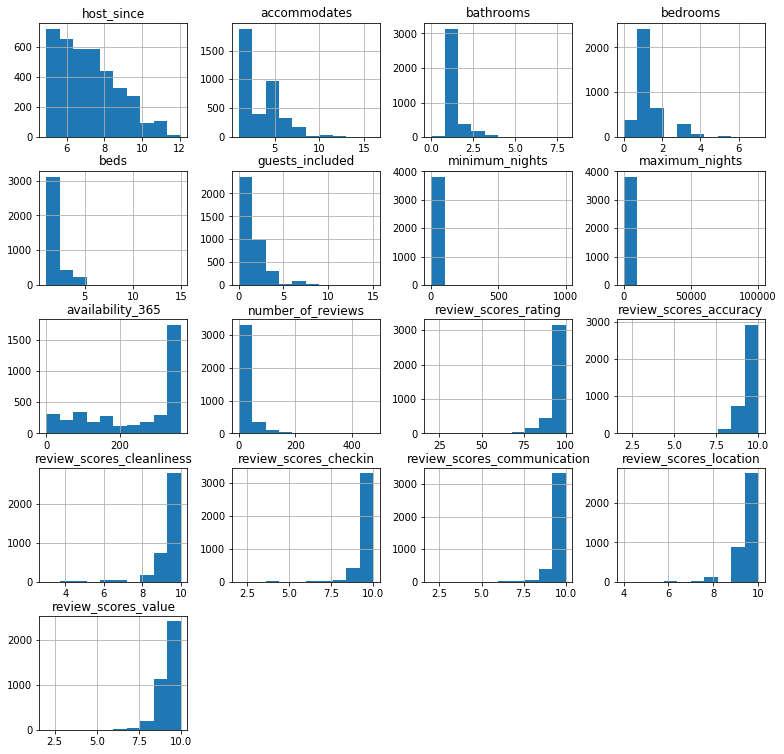

In [77]:
#Check the data distribution of the processed data below and see if there are any other issues
df.hist(figsize=(13,13))
# No

### Prepare Data

#### Clean

In [78]:
# View the type of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


After reviewing all the data in df2, it was found that some values may have been used as float, but now they are of object type, which involves data conversion. First, resolve the missing values before addressing this data type

In [79]:
#View the number of missing values
df2.isnull().sum().sort_values(ascending=False)

price         459028
available          0
date               0
listing_id         0
dtype: int64

Due to the fact that filling so much data with price may not match the authenticity of the data, all missing values of price will be deleted

In [80]:
# Delete rows with missing values
df2.dropna(inplace=True)
df2

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00
...,...,...,...,...
1393207,10208623,2016-01-06,t,$87.00
1393208,10208623,2016-01-07,t,$87.00
1393211,10208623,2016-01-10,t,$87.00
1393212,10208623,2016-01-11,t,$87.00


In [81]:
#Check the number of missing values again
df2.isnull().sum().sort_values(ascending=False)
# Missing value processing completed

price         0
available     0
date          0
listing_id    0
dtype: int64

Data type conversion processing

In [82]:
# Data Conversion
df2.date = pd.to_datetime(df2.date)

In [83]:
# Convert price to float for later use
df2.price = df2.price.str.replace('["$",","]','',regex=True).astype('float')

In [84]:
# Check the types of all data,
df2.info()
# All data to be used has been converted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   available   934542 non-null  object        
 3   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.6+ MB


In [97]:
#Since the first question does not require the use of price, the first question was not addressed, and data conversion was carried out in the third question
df3.price = df3.price.str.replace('["$",","]','',regex=True).astype('float')

## Part 4: Modeling 

In [98]:
# Delete price as x and price as y from df3
x = df3.drop('price',axis=1)
y = df3['price']

In [99]:
#Get x_ Dummies processing
x=pd.get_dummies(x)

### Fit Modeling 

Tasks such as model building and hyperparameter selection for grid search, data segmentation, etc

In [100]:
model=RandomForestRegressor()
param_grid = {
    'max_features': [3,5],
     'max_depth': [3,5]
}


model_add= GridSearchCV(model, param_grid,cv = 3)

# After wide search, I kept the best parameters. If you would like to try others, it may take long time
# I used GPU to fit the model as it takes less time

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [102]:
# model train
model_fit = model_add.fit(x_train, y_train)

C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

In [103]:
print("model score: %.2f" % model_fit.score(x_test, y_test))
# As our dataset is small, I could achieve r^2 value as 0.55 . Clearly, our model tends to overfit but its ok with our dataset

model score: 0.34


In [104]:
y_pred=model_add.predict(x_test)

## Part 5: Evaluate the Results

### Q1. How To Be a Super Host? 

To address this issue, we will conduct correlation analysis and start with number_ Of_ Reviews and hosts_ Response_ Time and room_ The three aspects of type are used to solve this problem

In [105]:
# First we need to replace `t` and `f` values in the `host_is_superhost` to be 1 or 0 so we can proceed in analysis easiar
df.host_is_superhost.replace({'t': 1, 'f': 0},inplace=True)

### Analyse

Firstly, perform a correlation analysis to determine the correlation between other features and the host_ Is_ A box plot and two BRTHs were created to illustrate the correlation between superhosts. The following will explain the correlation based on the plot

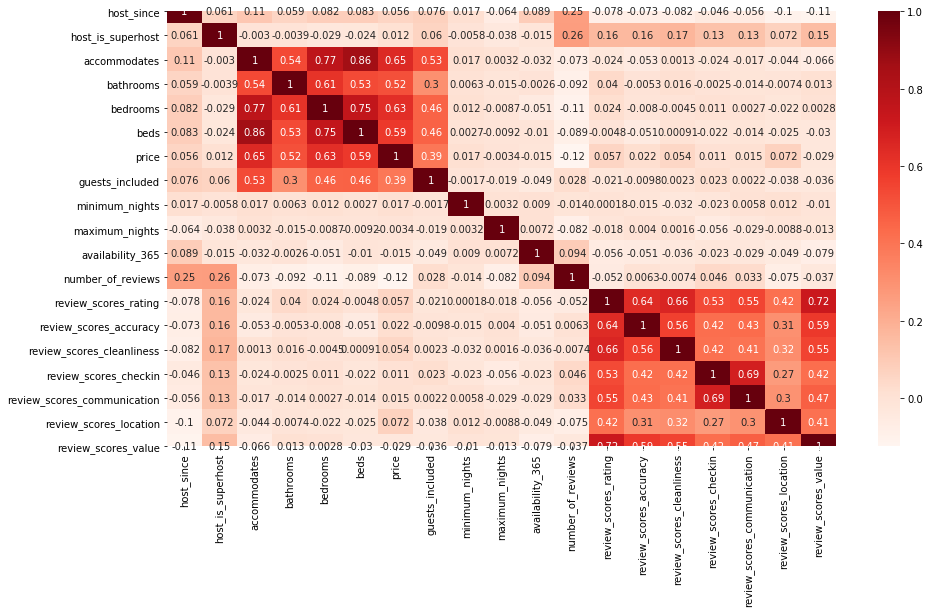

In [106]:
# Correlation analysis of DF datasets was obtained
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap='Reds')
#For host_ Is_ The maximum correlation between superhosts is only 0.2, so the following analysis will focus on three characteristics

### Visualise

Next, we will visualize the three features. Finally, I will conduct a unified analysis of all the graphs

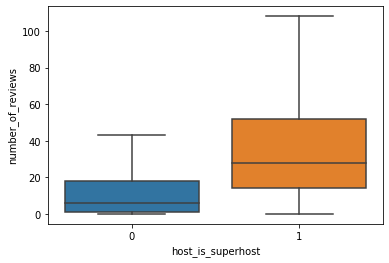

In [107]:
# Draw a box diagram of the host_is-superhost and number_of_reviews，
sns.boxplot(x='host_is_superhost', y= 'number_of_reviews', data=df, showfliers = False)

In [108]:
def barh(features,color='Blue'):
    '''
    input:
           features: The required features and 
           color: colors in the image
    output:
           A BRTH drawn from host_is_superhost and features
    '''
    group = df.groupby(features).mean()
    plt.barh(y=group.index, width=group.host_is_superhost,color=color)

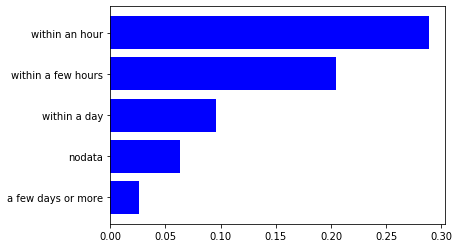

In [109]:
#Draw a bar chart to determine the relationship between super hsot and response time
barh('host_response_time')

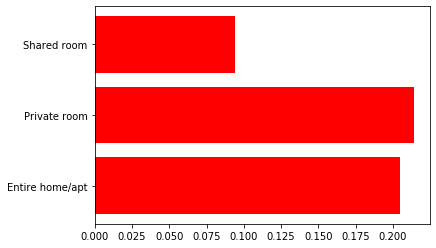

In [110]:
#Draw a bar chart to determine the relationship between super host and house types
barh('room_type',color='Red')

###  Brief explaination for visualisation

From the box plot, it can be seen that the number that becomes a superhost is higher than the number that is not a superhost_ Of_ The reviews are higher,

From the two bar charts, it can be seen that the shorter the response time, the closer it is to 1. The room type is Shared Room, which is closer to 0, while the other two types are similar

### Answer: How To Be a Superhost
From the visualization, it can be seen that the more comments there are, the more positive reviews there are, and the higher the probability of becoming a super landlord

The shorter the response time, the higher the probability of becoming a super landlord. Who doesn't like instant replies?

Try not to use shared rooms as much as possible, but this is not absolute. It may be because people don't like shared rooms nowadays, or the data may not be comprehensive enough

### Q2. How the Price/Night Change Over the Year in Seattle?

To solve this problem, first we will convert the object type to other types such as float, check the distribution of all features, and draw a bar chart of the average price of all months in December of the year. The higher the vertical axis, the higher the price of this month

### Visualise

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3BCC2CE48>,
      dtype=object)

<Figure size 936x936 with 0 Axes>

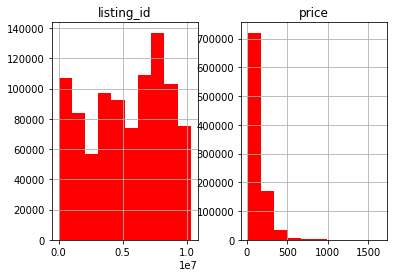

In [111]:
# Using histograms to determine how data is distributed
plt.figure(figsize=(13,13))
df2.hist(color='Red')

### Analyse

In [112]:
# Group the data by month and view the number of prices for each month
df2.groupby(by=df2['date'].dt.strftime('%b')).price.count()

date
Apr    76037
Aug    76347
Dec    87061
Feb    73321
Jan    64937
Jul    74222
Jun    77244
Mar    83938
May    79971
Nov    81780
Oct    82438
Sep    77246
Name: price, dtype: int64

### Visualise

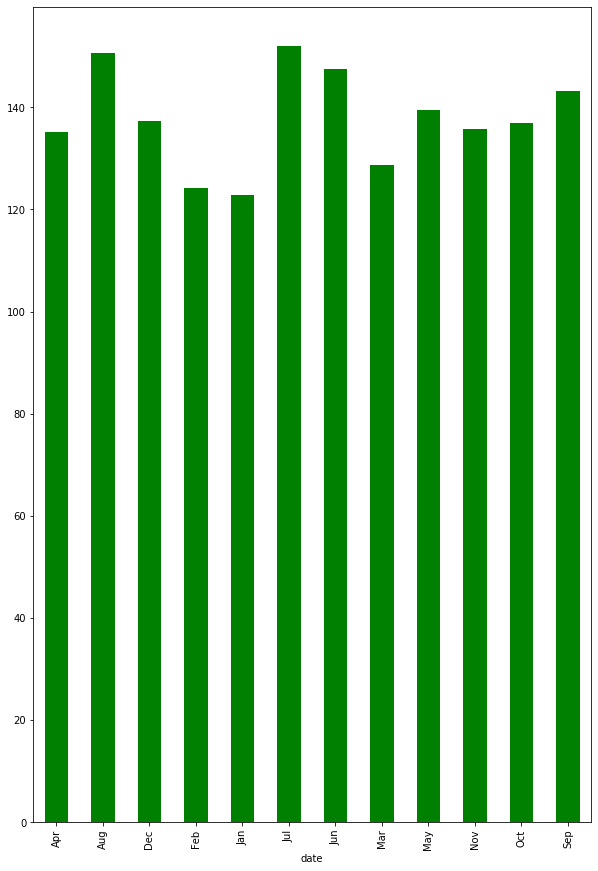

In [113]:
# By using a bar chart, it is easy to see the annual variation of the average price
Seattle_group = df2.groupby(by=df2['date'].dt.strftime('%b')).price.mean()
plt.figure(figsize=(10,15));
Seattle_group.plot.bar(x=Seattle_group.index, y= Seattle_group.values,color='Green');

### Brief explanation for visualisation

From the bar chart, it can be seen that some months have small prices, while others have large prices, which are uneven. Next, I will provide detailed answers to the questions

### Answer: How the Price/Night Change Over the Year in Seattle?

Rental prices are highest during the summer months, but after the summer months, prices continue to drop until the end of winter
There is also a certain relationship between whether you become a super landlord and the type of rent, and the worse the house, the less likely it is to become a super landlord 

### Q3. Can we Predict Property Price/Night in Seattle Using Machine Learning Model?

To solve this problem, first we should process the data and divide it into training and testing sets, determine the hyperparameters and models for grid search, and train them. Finally, we should predict the price and evaluate a graph

### Validate the model

Model evaluation: Comparing predicted values with actual values to determine the effectiveness of the model

C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\u0033141\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


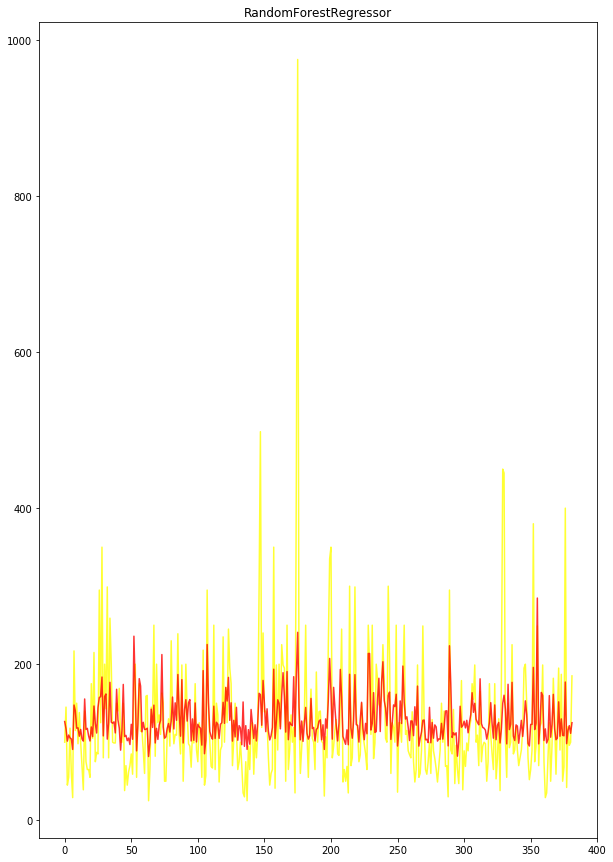

In [114]:
plt.figure(figsize=(10,15))
plt.plot([i for i in range(y_test.shape[0])], y_test, color='yellow', alpha=0.8, label="y_test")
plt.plot([i for i in range(y_test.shape[0])], y_pred, color='red', alpha=0.8, label="y_pred")
plt.title("RandomForestRegressor")
plt.show()


### Answer: Q3. Can we predict Property Price/Night in Seattle & Boston Using Machine Learning Model
- I used a random forest and grid search in the machine learning model, cross-validation to solve this problem, the score is 0.30, due to the time constraints, you can try other models, you can add other datasets, maybe the effect will be better